In [18]:
!pip install tqdm

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings("ignore")

from tqdm import tqdm
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "malgun gothic"

In [2]:
df = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/2022_표준지_공시지가.csv")
df

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


In [3]:
df.info()
#54만 건이 있음. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

In [5]:
df["시도명"].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

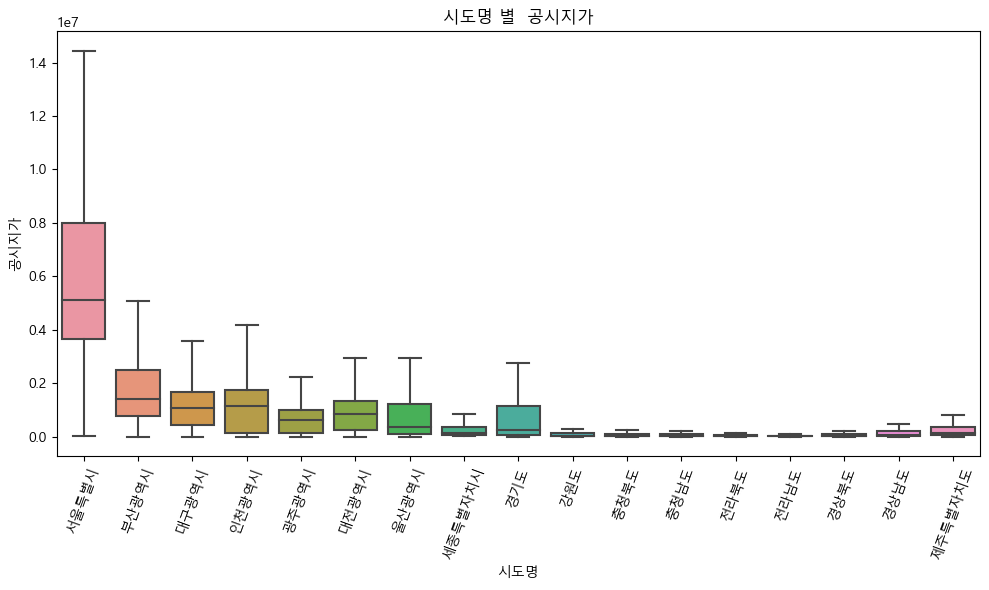

In [6]:
#내가만든것 
plt.figure(figsize= (10,6))
sns.boxplot(x = df["시도명"], y= df["공시지가"] , showfliers = False) # showfliers  = False >>> 이상치제거 
plt.title("시도명 별  공시지가")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

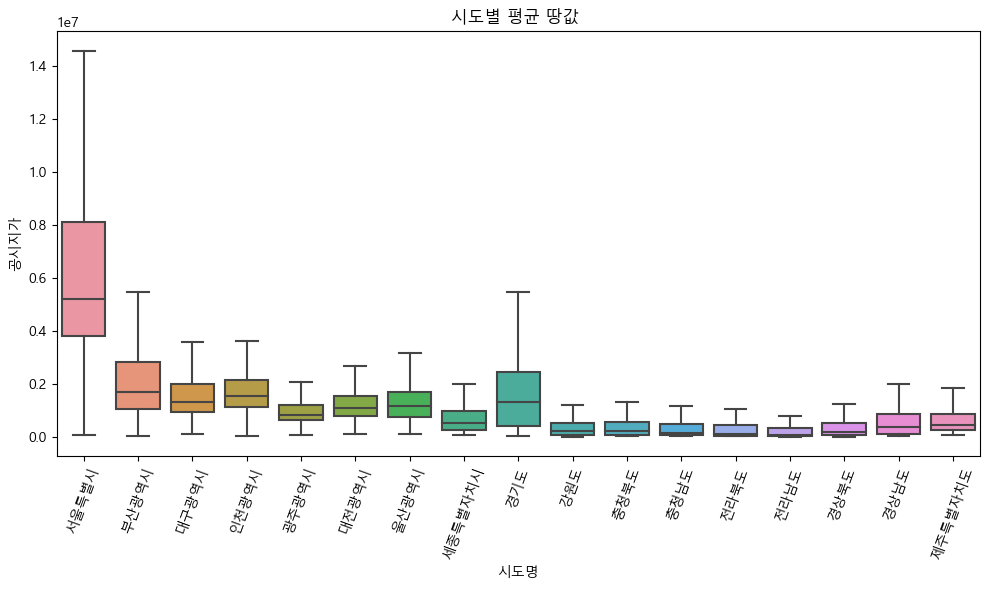

In [7]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df[df["지목"]=="대"] , x="시도명", y="공시지가", showfliers = False)
plt.title("시도별 평균 땅값 ")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

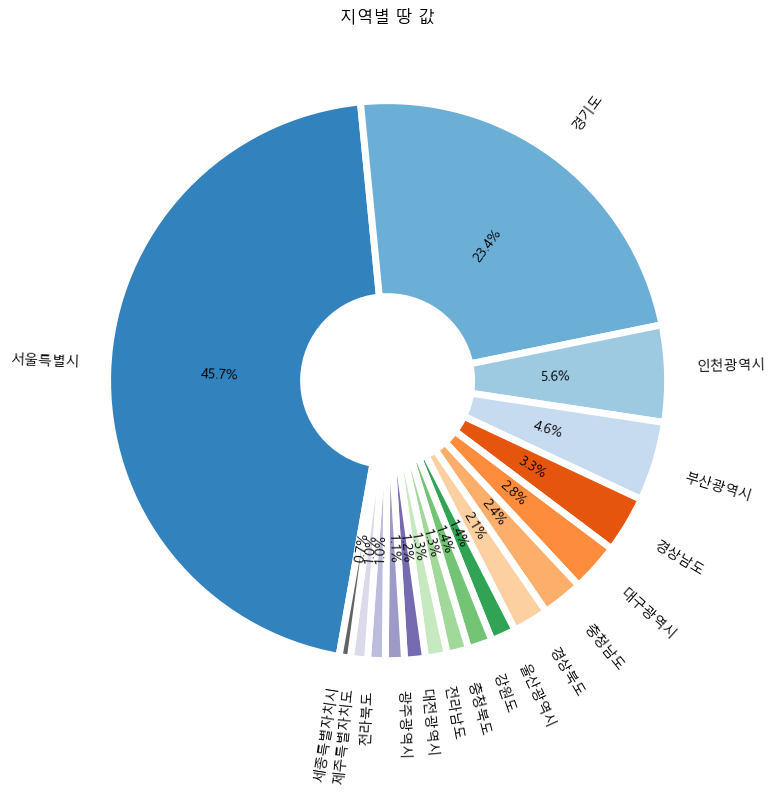

In [8]:
df["가치"] = df["면적"] * df["공시지가"]
pivot_table = pd.pivot_table(df, values="가치", index="시도명", aggfunc=sum).sort_values(by="가치", ascending=False)
values = pivot_table["가치"]

s3 = plt.get_cmap("tab20c")
plt.figure(figsize=(10,10))
plt.title("지역별 땅 값")
patches, labels, pct_texts = plt.pie(values,
                                     labels=values.index,
                                     autopct="%1.1f%%",
                                     startangle=260,
                                     counterclock=False,
                                     colors=s3.colors[:len(values)],
                                     wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5},
                                     textprops={'fontsize': 10 },
                                     rotatelabels=90)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

plt.subplots_adjust(left=0.2)
plt.show()

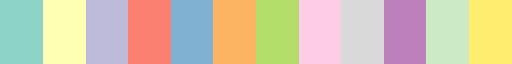

In [9]:
s3 = plt.get_cmap("Set3")
s3

<BarContainer object of 3 artists>

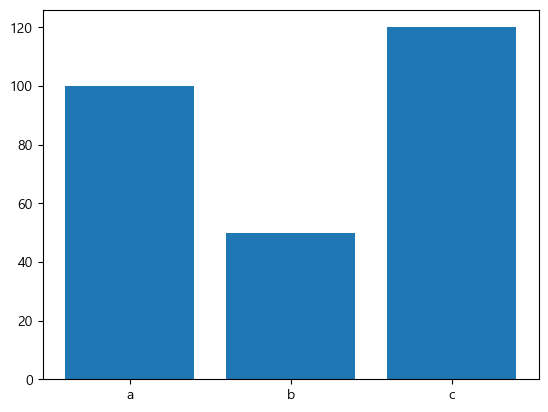

In [10]:
plt.bar(["a","b","c"] , [100,50,120])

In [11]:
df["도로교통"].unique()

array(['세로(불)', '맹지', '세로(가)', '소로각지', '광대세각', '광대한면', '세각(가)', '중로한면',
       '중로각지', '소로한면', '세각(불)', '광대소각'], dtype=object)

In [12]:
price_by_traffic = df.groupby("도로교통")["공시지가"].mean().sort_values(ascending=False)

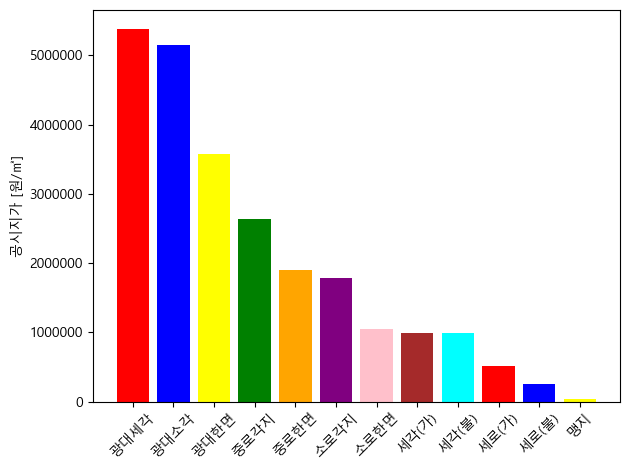

In [13]:
color = ["red","blue","yellow","green","orange","purple","pink","brown",'cyan']
plt.bar(price_by_traffic.index , price_by_traffic.values, color = color)
plt.xticks(rotation = 45)
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("공시지가 [원/㎥]")
plt.tight_layout()
plt.show()

NameError: name 'ticker' is not defined

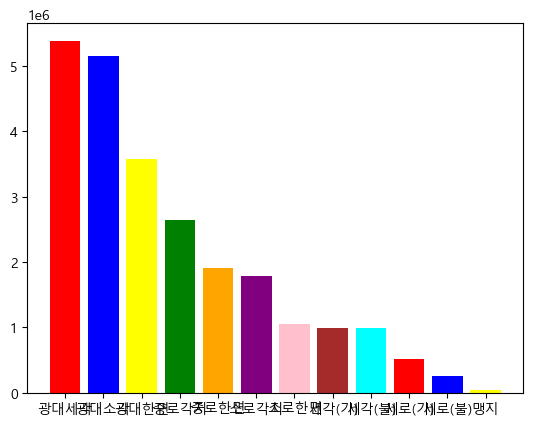

In [14]:
from matplotlib.pyplot import FuncFormatter
color = ["red","blue","yellow","green","orange","purple","pink","brown",'cyan']

# y축 값 포맷팅 함수
def format_func(value, tick_number):
    if value >= 1e6:
        value /= 1e6
        return f"{value:,.0f} 백만원"
    else:
        return f"{value:,.0f}"
 
plt.bar(price_by_traffic.index , price_by_traffic.values, color = color)
formatter = ticker.FuncFormatter(format_func)
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel("공시지가 [원/㎥]")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [15]:
for i in ['주위환경', '지세명', '형상명', '도로교통']:
    tmp= df.groupby(i)["공시지가"].mean()
    print(i,"약", tmp.std()//10000,"만원")

주위환경 약 526.0 만원
지세명 약 42.0 만원
형상명 약 82.0 만원
도로교통 약 181.0 만원


In [142]:
!pip install geopy

     ---------------------------------------- 0.0/119.8 kB ? eta -:--:--
     -------------------------------------- 119.8/119.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [21]:
geocoding("창원시 의창구 봉곡동 151-7")

[35.2466659, 128.6593324]

In [27]:

df = df[df["시도명"]=="세종특별자치시"]

In [29]:
address = df["시도명"]+" "+df["시군구명"]+" "+df["소재지"]
latitude = []
longitude =[]

for i in tqdm(address):
    lat , lon = geocoding(i)
    latitude.append(lat)
    longitude.append(lon)
    

100%|██████████| 2522/2522 [21:02<00:00,  2.00it/s]


In [31]:
longitude

[11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,
 11.0480288,

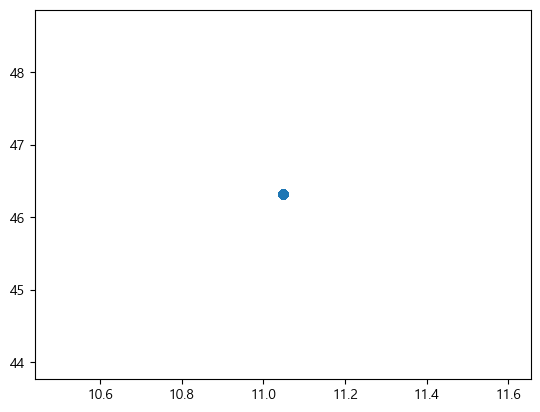

In [34]:
plt.scatter(x= longitude, y = latitude)
plt.show()

In [35]:
#만약 0,0  이 있으면 나오게 하는것. 
longitude_arr = np.array(longitude)
latitude_arr = np.array(latitude)

mask = longitude_arr != 0
mask.sum()

2522

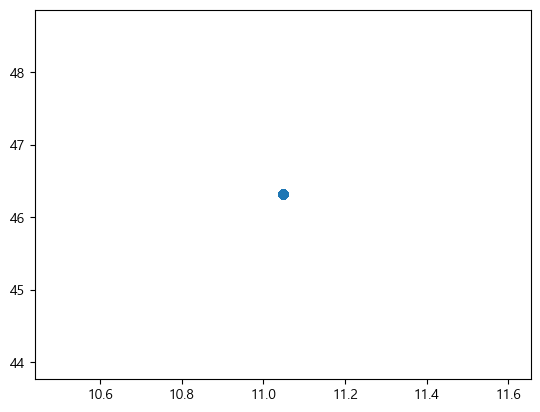

In [36]:
plt.scatter(x= longitude_arr[mask], y = latitude_arr[mask])
plt.show()

In [37]:
price =df["공시지가"].values

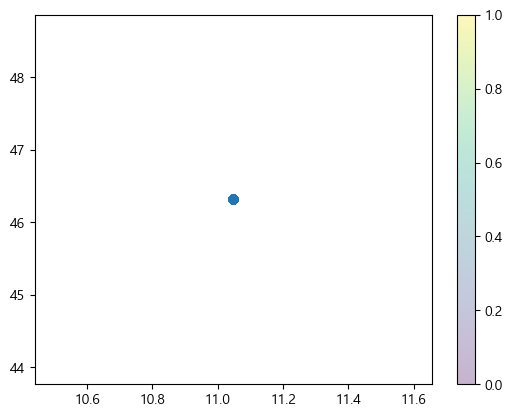

In [43]:
plt.scatter(longitude_arr[mask],
           latitude_arr[mask],
           c = price[mask],
           alpha=0.3)
plt.colorbar()
plt.show()

In [58]:
%matplotlib qt5

In [59]:
fig = plt.figure()
l = len(longitude_arr[mask])
ax2 = fig.add_subplot(111, projection="3d")

ax2.bar3d(x=longitude_arr[mask],
          y=latitude_arr[mask],
          z=np.zeros(l),
          dx=0.001,
          dy=0.001,
          dz=price[mask],
          color="red")

plt.show()
